In [95]:
%load_ext autoreload
%autoreload 2
import numpy as np
from helper import visualize_input, plot_images
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Cargo imagenes

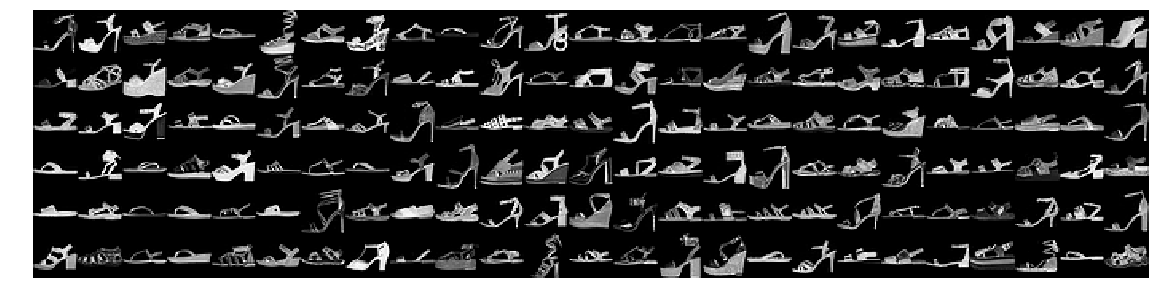

In [96]:
# Cargo las sandalias de disco.
sandalias = np.load('sandalias.npy')
# Las grafico con la función plot_images
# plot_images(array con imageners, Cantidad a graficar, columnas)
plot_images(sandalias,150, columns=25)

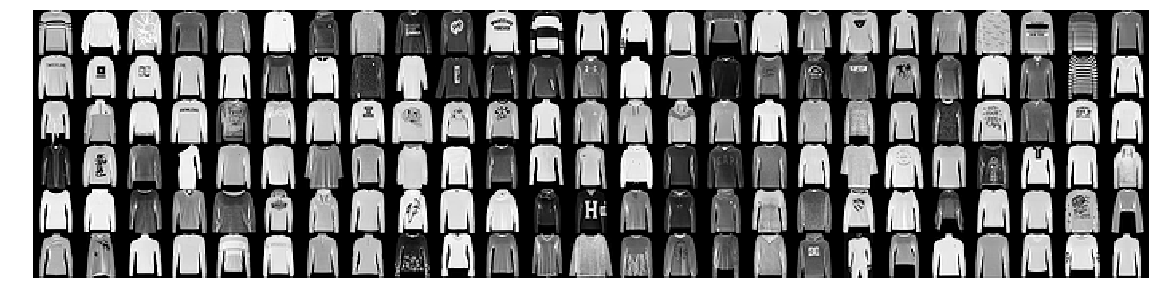

In [97]:
# Lo mismo para los buzos
buzos = np.load('buzos.npy')
plot_images(buzos,150, columns=25)

In [98]:
# Imprimo las dimensiones
print('Dimensiones de sandalias: ', sandalias.shape)
print('Dimensiones de buzos: ', buzos.shape)

Dimensiones de sandalias:  (6000, 28, 28)
Dimensiones de buzos:  (6000, 28, 28)


Como se interpreta? Hay 6000 imágenes de sandalias de 28x28 pixeles  
Lo mismo para los buzos

## Representación de imágenes

Como hago para refererime a la primer sandalia?:  
sandalias[0]

In [99]:
# Notar el subinidice en cero
primer_sandalia = sandalias[0]

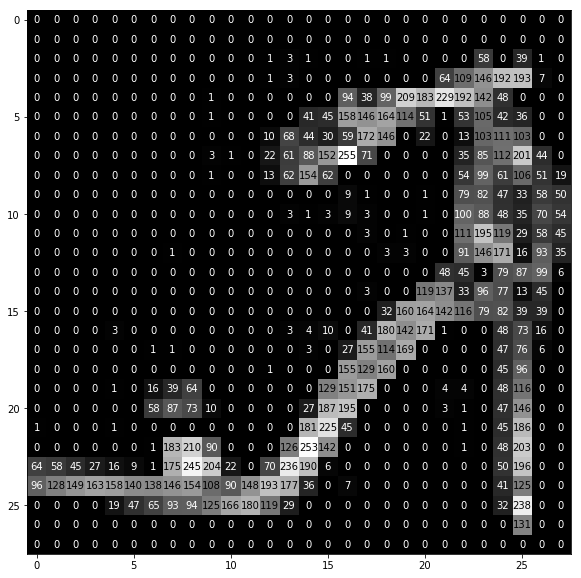

In [101]:
# Grafico primer sandalia (a esta sandalia la llamaremos sandalia 0)
visualize_input(primer_sandalia)
plt.show()

- Notar que cada pixel esta representado por un numero entre 0 y 255.
- 0 indica negro
- 255 indica blanco
- Los valores intermedios son los grises entre negro y blanco

## Grafico imagen

In [102]:
from matplotlib import pyplot as plt

Podemos graficar cada imagen directamente con la función imshow de matplotlib

Por ejemplo grafiquemos la sandalia 10

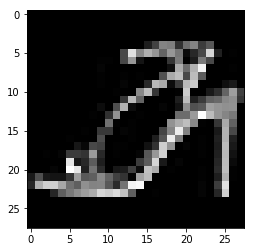

In [103]:
# cmap es lo que se denomina colormap. Le estamos indicando que 
# grafique los valores entre 0 y 255 como estala de grises
plt.imshow(sandalias[10], cmap='gray')
plt.show()

O el buzo 5:

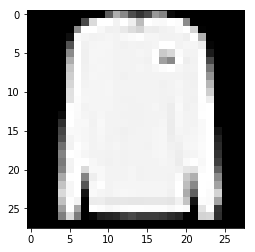

In [9]:
plt.imshow(buzos[5], cmap='gray')
plt.show()

### Ejercicio 1: 
Que valor tiene el pixel (20,5) del buzo 18? (Donde 20 es la fila y 5 es la columna)

In [104]:
print(buzos[18, 20, 5])

216


### Ejercicio 2:
Imprimir los valores de los 4 pixeles centrales de la sandalia 10:

In [105]:
print(sandalias[10, 13:15, 13:15])

[[0 2]
 [2 0]]


### Ejercicio 3:
Imprimir los valores de los 4 pixeles centrales del buzo 5:

In [106]:
print(buzos[5, 13:15, 13:15])

[[242 242]
 [242 242]]


## Histograma de una imagen
** Nuestra estimación de la función de masa de probabilidad **

### Probabilidad de algún pixel = 0
(Alguno de los 784 pixeles)

Trabajaremos con la sandalia 10 y el buzo 5

Que tan probable es que agarre un pixel al azar de la sandalia 10 y me de 0?

Cuantos pixeles tenemos en la sandalia 10?:

In [107]:
sandalias[10].shape

(28, 28)

In [109]:
total_pixeles_imagen = sandalias[10].shape[0]*sandalias[10].shape[1]
print(total_pixeles_imagen)

784


Cuantos pixels en cero tiene la sandalia 10?

In [110]:
pixeles_en_cero_10 = (sandalias[10] == 0).sum()
print(pixeles_en_cero_10)

528


La estimación de la probabilidad es:

In [111]:
p_0_sand_10 = pixeles_en_cero_10/total_pixeles_imagen
print(p_0_sand_10)

0.673469387755


Cual es la probabilidad de un cero en el buzo 5?

In [112]:
# Hacemos los mismo ahora con el buzo 5
p_0_buzo_5 = (buzos[5] == 0).sum() / total_pixeles_imagen
print(p_0_buzo_5)

0.341836734694


### Histograma de una imagen
Ahora no solo trabajemos con la probabilidad de que sea cero sino cualquier otro valor posible en el espacio muestral: [0, 255]

In [113]:
hist_sandalia_10 = []
pixeles = list(range(256))
for pixel in pixeles:
    # notar sandalias[10] == pixel, donde pixel va de 0 a 255
    prob_sand_10_pixel = (sandalias[10] == pixel).sum() / total_pixeles_imagen
    hist_sandalia_10.append(prob_sand_10_pixel)

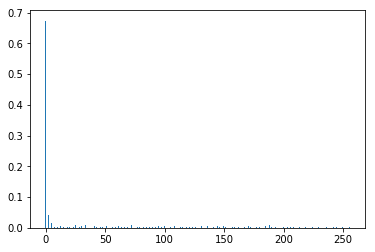

In [114]:
# Como es de esperar el cero es el mas probable
plt.bar(pixeles, hist_sandalia_10)
plt.show()

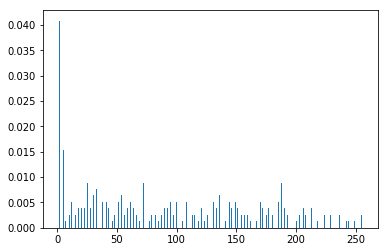

In [115]:
# Graficamos desde la segunda muestra para ver detalles del resto del histograma
plt.bar(pixeles[1:], hist_sandalia_10[1:])
plt.show()

Lo mismo para el buzo 5:

In [116]:
hist_buzo_5 = []
for pixel in pixeles:
    prob_buzo_5_pixel = (buzos[5] == pixel).sum() / total_pixeles_imagen
    hist_buzo_5.append(prob_buzo_5_pixel)

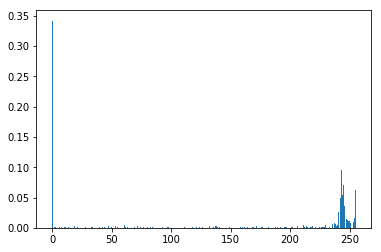

In [117]:
# Notar que a pesar de que el cero es el mas probable, tambien ya se ven altas componentes 
# en grises claros
plt.bar(pixeles, hist_buzo_5)
plt.show()

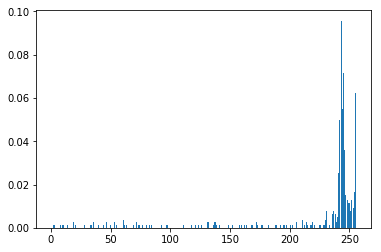

In [118]:
plt.bar(pixeles[1:], hist_buzo_5[1:])
plt.show()

## Histograma de una Clase
Mejoramos estimación
### Probabilidad de algún pixel = 0
En todo el dataset de sandalias o buzos.

Podemos mejorar la probabilidad de tener un pixel en cero para un buzo usando todos los buzos, y lo mismo para las sandalias

Cual es la estimación de la probabilidad de obtener un cero un cualquier sandalia?

Cuantos pixeles vamos a analizar:

Todos los pixeles de las sandalias: 6000x28x28

In [119]:
# como hay la misma cantidad de imagenes para sandalias y buzos, habrá la misma cantidad de pixeles
total_pixeles = sandalias.shape[0]*sandalias.shape[1]*sandalias.shape[2]
print(total_pixeles)

4704000


In [120]:
# Notar que a diferencia del anterior aca no indexo a sandalias, ya que quiero todas
pixeles_en_cero = (sandalias == 0).sum()

In [121]:
p_0_sandalia = pixeles_en_cero / total_pixeles
print(p_0_sandalia)

0.678858630952


Es interesante notar que la primer sandalia era representativa del total de sandalias ya que la estimación de la probabilidad da similar

Veamos en los buzos:

In [122]:
p_0_buzos = (buzos == 0).sum() / total_pixeles
print(p_0_buzos)

0.35128125


### Histograma de toda la clase
La clase puede ser buzo o sandalia. Y consideramos cualquier valor de gris entre 0 y 255 (No solo el cero)

Para sandalias:

In [123]:
hist_sandalias = []
pixeles = list(range(256))
for pixel in pixeles:
    # notar sandalias == pixel
    prob_sand_pixel = (sandalias == pixel).sum() / total_pixeles
    hist_sandalias.append(prob_sand_pixel)

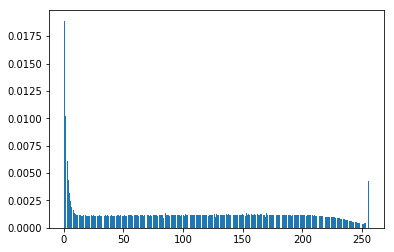

In [124]:
plt.bar(pixeles[1:], hist_sandalias[1:])
plt.show()

Para buzos:

In [30]:
hist_buzos = []
pixeles = list(range(256))
for pixel in pixeles:
    prob_buzos_pixel = (buzos == pixel).sum() / total_pixeles
    hist_buzos.append(prob_buzos_pixel)

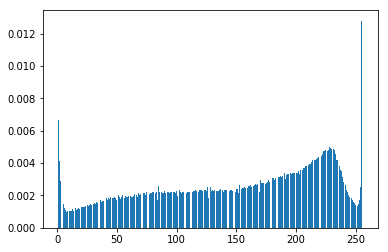

In [31]:
plt.bar(pixeles[1:], hist_buzos[1:])
plt.show()

** La diferencia entonces de estos histogramas es que son la estimación de la función de masa de probabilidad de los buzos o sandalias hecha sobre todas las imagenes. Los primeros eran sobre la sandalia 10 y el buzo 5 **

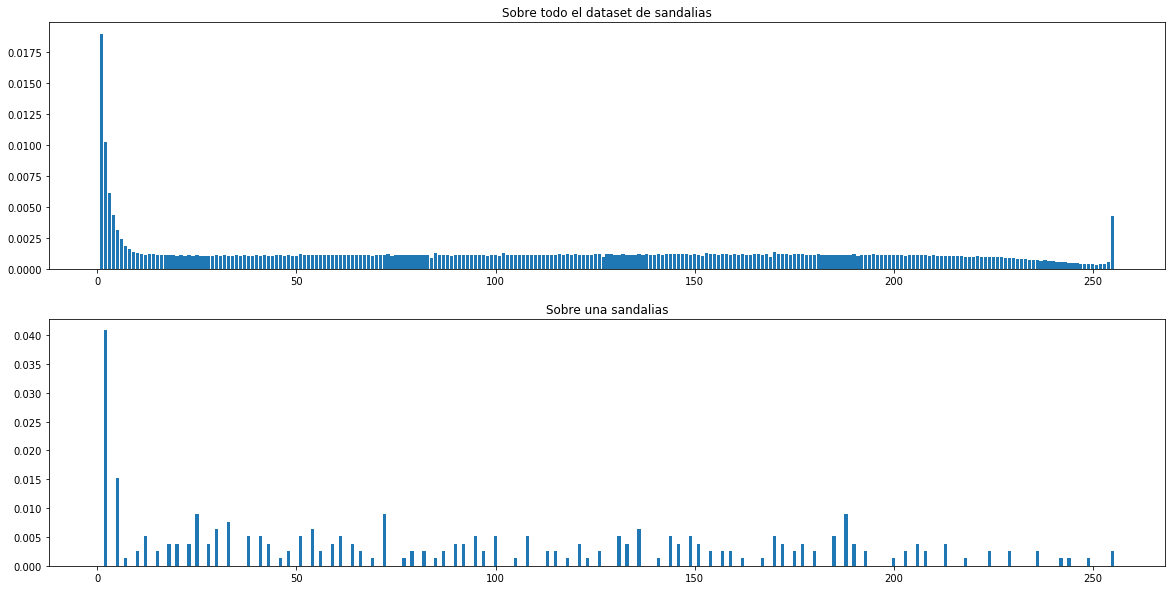

In [142]:
f, ax= plt.subplots(2,1, figsize=(20,10))
ax[0].bar(pixeles[1:], hist_sandalias[1:])
ax[0].set_title('Sobre todo el dataset de sandalias')
ax[1].bar(pixeles[1:], hist_sandalia_10[1:])
ax[1].set_title('Sobre una sandalias')
plt.show()

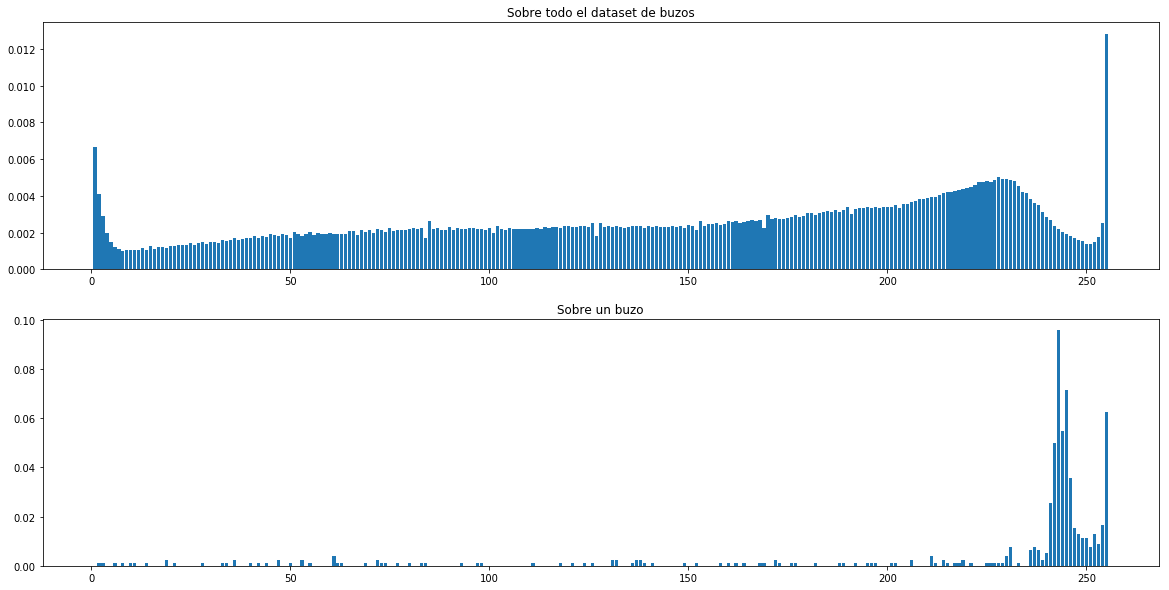

In [143]:
f, ax= plt.subplots(2,1, figsize=(20,10))
ax[0].bar(pixeles[1:], hist_buzos[1:])
ax[0].set_title('Sobre todo el dataset de buzos')
ax[1].bar(pixeles[1:], hist_buzo_5[1:])
ax[1].set_title('Sobre un buzo')
plt.show()

### Que podríamos hacer con esto?
Cuando me dan una imagen nueva y tengo que clasificarla como buzo o sandalia el procedimiento sería:
- Calculo el histograma de la imagen
- Lo comparo contra el de las sandalias de todo el dataset
- Lo comparo contra el de los buzos de todo el dataset
- Si se "parece más" al de los buzos es buzo, si no es sandalia.

Obviamente este método no es preciso y tampoco definimos que significa comparar dos histogramas.

Una de las falencias es que si la imagen esta *invertida*, nosotros seguiriamos reconociendo la imagen pero nuestro algoritmo seguramente fallaría:

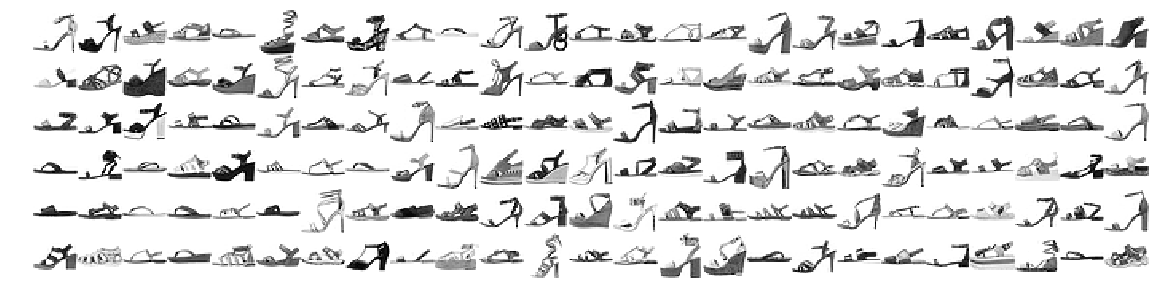

In [144]:
# Sandalias invertidas
plot_images(255-sandalias,150, columns=25)

## Histograma de un pixel por clase
Una posibilidad es hacer un histograma por cada pixel

Nota: hablaremos de probabilidades, pero siempre son estimaciones de las probabilidades

Cual es la probabilidad de que el pixel (14, 14) sea negro dado que es una sandalia?

In [145]:
p_14_14_0_sand = (sandalias[:, 14, 14] == 0).sum()/sandalias.shape[0]
print(p_14_14_0_sand)

0.457833333333


Formalmente:  
$P(pix_{14,14}=0 \ |\  Sandalia) = 0.457833$

Con los buzos:

In [146]:
p_14_14_0_buzos = (buzos[:, 14, 14] == 0).sum()/buzos.shape[0]
print(p_14_14_0_buzos)

0.00533333333333


Formalmente:  
$P(pix_{14,14}=0 \ |\  Buzo) = 0.00533$

Como lo usamos:

Supongamos que nos dan una imagen, observo el punto 14, 14 y es un cero. Cual elijo?

Buzo o sandalia?

En este caso es claro intuitivamente, pero formalmente queremos ver si la probabilidad de la sandalia dado que observe un cero en la posición 14, 14 es mas alta que la del buzo:

¿$P(Sandalia \ |\  pix_{14,14}=0) > P(Buzo \ |\  pix_{14,14}=0)$?

Por bayes:

$P(Sandalia \ |\  pix_{14,14}=0) = \huge\frac{P(pix_{14,14}=0 \ |\ Sandalia ) P(Sandalia)}{P(pix_{14,14}=0)}$

In [147]:
P_pix_14_14_0 = ((sandalias[:, 14, 14]==0).sum() + (buzos[:, 14, 14]==0).sum()) / (12000)

In [148]:
P_sandalia = 6000/12000

In [149]:
P_sandialia_pix_14_14_0 = p_14_14_0_sand*P_sandalia/P_pix_14_14_0
print(P_sandialia_pix_14_14_0)

0.988485066571


Para el buzo:

In [150]:
P_buzo = 6000/12000

In [151]:
P_buzo_pix_14_14_0 = p_14_14_0_buzos*P_buzo/P_pix_14_14_0
print(P_buzo_pix_14_14_0)

0.0115149334293


In [152]:
P_sandalia + P_buzo

1.0

### Histograma del punto 14, 14
Y si observo otro valor?
No observamos un cero si no cualquier otro de los 255 posibles restantes

#### Sandalias

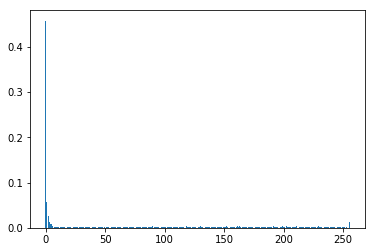

In [153]:
p_14_14_sand = []
for pixel in pixeles:
    p_14_14_sand.append((sandalias[:, 14, 14] == pixel).sum()/sandalias.shape[0])
plt.bar(pixeles, p_14_14_sand)
plt.show()

In [42]:
np.array(p_14_14_sand).sum()

1.0

#### Buzos

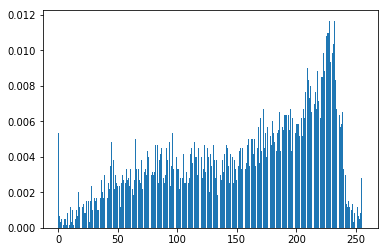

In [43]:
p_14_14_buzos = []
for pixel in pixeles:
    p_14_14_buzos.append((buzos[:, 14, 14] == pixel).sum()/buzos.shape[0])
plt.bar(pixeles, p_14_14_buzos)
plt.show()

In [44]:
np.array(p_14_14_buzos).sum()

1.0

In [45]:
def prob_sand_pixel(pixel):
    P_sandalia = 6000/12000
    p_14_14_pixel_sand = (sandalias[:, 14, 14] == pixel).sum()/sandalias.shape[0]
    # Probabilidad total
    P_14_14_pixel = ((sandalias[:, 14, 14]==pixel).sum() 
                         + (buzos[:, 14, 14]==pixel).sum()) / (12000)
    return p_14_14_pixel_sand*P_sandalia/P_14_14_pixel

def prob_buz_pixel(pixel):
    P_buzo = 6000/12000
    p_14_14_pixel_buzo = (buzos[:, 14, 14] == pixel).sum()/buzos.shape[0]
    # Probabilidad total
    P_14_14_pixel = ((sandalias[:, 14, 14]==pixel).sum() 
                         + (buzos[:, 14, 14]==pixel).sum()) / (12000)
    return p_14_14_pixel_buzo*P_buzo/P_14_14_pixel

In [46]:
pixel = 10
prob_sand_pixel(pixel), prob_buz_pixel(pixel)

(0.53333333333333333, 0.46666666666666667)

In [47]:
p_sand_final = [prob_sand_pixel(pixel) for pixel in pixeles]

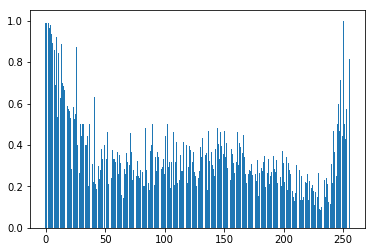

In [48]:
plt.bar(pixeles, p_sand_final)
plt.show()

Algo bastante inesperado? Si obtengo pixeles de valores altos tambien hay alta probabilidad de que sea sandalia.

## Conjunta: Más de un pixel

Cual es el espacio muestral con 2 pixels?

In [154]:
espacio_muestral = np.stack(np.meshgrid(pixeles, pixeles)).T.reshape(-1,2)

In [155]:
# Notar que la cantidad de posibilidades es 256 al cuadrado
espacio_muestral.shape

(65536, 2)

In [156]:
espacio_muestral[:10]

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [0, 9]])

In [157]:
espacio_muestral[256:256+10]

array([[1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [1, 9]])

In [158]:
# La sandalia cero tiene dos ceros en la posición:
# filas 13:14, columna 14
sandalias[0,13:15,14] == [0, 0]

array([ True,  True], dtype=bool)

In [160]:
# Todas las sandalias y su coincidencia con un [0, 0]
sandalias[:,13:15,14] == [0, 0]

array([[ True,  True],
       [False,  True],
       [False,  True],
       ..., 
       [False, False],
       [ True,  True],
       [ True,  True]], dtype=bool)

In [57]:
# Sumo los true en el eje 1
(sandalias[:,13:15,14] == [0, 0]).sum(axis=1)

array([2, 1, 1, ..., 0, 2, 2])

In [161]:
# Los comparo con 2 por que los dos tienen que coincidir (Es la conjunta)
((sandalias[:,13:15,14] == [0,0]).sum(axis=1) == 2).sum()

1926

In [162]:
P_0_0_sand = ((sandalias[:,13:15,14] 
               == [0,0]).sum(axis=1) == 2).sum()/sandalias.shape[0]
P_0_0_sand

0.32100000000000001

In [163]:
def prob_2_pixels(clase, pixels):
    # Clase pude ser sandalias o buzos. Es el listado de imagenes
    # Pixels son los valores de los pixeles adyacentes
    return ((clase[:,13:15,14] == pixels).sum(axis=1) == 2).sum()/clase.shape[0]

In [164]:
# Probabilidad de observar los pixeles 0, 0 en las posiciones 
# 13, 14 vertical, 14 horizontal dado que es sandalia
prob_2_pixels(sandalias, [0,0])

0.32100000000000001

In [165]:
# Elijan al azar cualquier par
prob_2_pixels(sandalias, [10,45])

0.0

In [167]:
# Ahora para los buzos
# Probabilidad de observar los pixeles 0, 0 en las posiciones 
# 13, 14 vertical, 14 horizontal dado que es buzo
prob_2_pixels(buzos, [0,0])

0.0018333333333333333

In [92]:
# Calculo de toda la conjunta
def get_joint(clase):
    conjunta_clase = []
    # Recorro todo el espacio muestral
    for pixs in espacio_muestral:
        conjunta_clase.append(prob_2_pixels(clase, pixs))
    return conjunta_clase

In [66]:
%time conjunta_sand = get_joint(sandalias)

CPU times: user 16.1 s, sys: 108 ms, total: 16.2 s
Wall time: 16.4 s


### Problemas

- Ya empieza a ser significativo el tiempo de calculo de la conjunta con solo 2 pixeles
- Que tan buena es la estimación?

In [168]:
# De cuantas combinaciones de puntos no tengo información?
prob_cero_n = (np.array(conjunta_sand) == 0).sum()
prob_cero_n

62916

In [169]:
prob_cero_n/(256*256)

0.96002197265625

El 96% da probabilidad cero

In [170]:
256*256 - prob_cero_n

2620

Tenemos solo 2620 salidas de nuestro espacio muestral de 65536 y tenemos que hacer estadistica con 6000 muestras!!!

In [171]:
6000/2620

2.2900763358778624

en promedio tengo menos de 3 ocurrencias por punto

### Condiciones ideales
- Velocidad de procesamiento infinita
- Tamaño del dataset tan grande como quiera

En estas condiciones puedo calcular la conjunta. Y por que es tan importante?

** Si tengo la conjunta tengo todo **

Que puedo sacar de la conjunta?

Supongamos que nos dan una imagen y observamos que los pixeles 13, 14 son [0, 1]. Por eso lo que quiero saber es que es mas probable: Una sanadalia o un buzo?

$P(Sandalia \ |\  pix_{[13,14], 14}=[0, 1]) = \large\frac{P(pix_{[13,14], 14}=[0, 1] \ |\ Sandalia ) P(Sandalia)}{P(pix_{[13,14], 14}=[0, 1])}$

Si X es pixel 13 e Y el 14 de la columna 14 entonces:

$P(Sandalia \ |\  X=0, Y=1) = \large\frac{P(X=0, Y=1 \ |\ Sandalia ) P(Sandalia)}{P(X=0, Y=1)}$

Tenemos todo!

In [172]:
# Como P(Sandalia) y P(Buzo) son iguales y el denominador tambien, basta con calcular el lilelihood
pixels = [0, 1]
prob_2_pixels(sandalias,pixels), prob_2_pixels(buzos,pixels)

(0.038833333333333331, 0.00016666666666666666)

Pero en este caso, si le sacamos las idealizaciones, que problema tenemos?

In [174]:
# Tomo una imagen y obervo los valores 10, 56
pixels = [10, 56]
prob_2_pixels(sandalias,pixels), prob_2_pixels(buzos,pixels)

(0.0, 0.0)

Las probabilidades para la mayoría de las combinaciones del espacio muestral son cero tanto para la sandalia como para el buzo. Es esto razonable?

Si vinieran imagenes nuevas con alguna de estas combinaciones, no podría decidir. Ambas son iguales de probables

Conclusiones:

Intenté construir un modelo mejor pero al final solo me sirve para un porcentaje muy bajo de combinaciones... 

(Vale aclarar que uno podría argumentar que es posible que las combinaciones que no aparecieron en el dataset probablemente no aparezcan en las imagenes nueva. Pero... es esto razonable en esta aplicación?)

Sería interesante imaginar que pasa si ahora quiero armar una conjunta con 3 puntos!!! Todo los problemas se potenciarían

## Independencia -> Naive Bayes

Una de las formas de encarar el problema en casos donde la cantidad de ejemplos (imagenes) no es suficiente para estimar la conjunta puede ser suponer independencia:

$P(Sandalia \ |\  pix_{[13,14], 14}=[0, 1]) = \large\frac{P(pix_{[13,14], 14}=[0, 1] \ |\ Sandalia ) P(Sandalia)}{P(pix_{[13,14], 14}=[0, 1])}$

Suponiendo independencia:

$P(Sandalia \ |\  pix_{[13,14], 14}=[0, 1]) = \large\frac{P(pix_{13, 14}=0 \ |\ Sandalia )P(pix_{14, 14}=1 \ |\ Sandalia ) P(Sandalia)}{P(pix_{[13,14], 14}=[0, 1])}$

$P(Sandalia \ |\  X=0, Y=1) = \large\frac{P(X=0 \ |\ Sandalia )P(Y=1 \ |\ Sandalia ) P(Sandalia)}{P(X=0, Y=1)}$

Para buzo

$P(Buzo \ |\  X=0, Y=1) = \large\frac{P(X=0 \ |\ Buzo )P(Y=1 \ |\ Buzo ) P(Buzo)}{P(X=0, Y=1)}$

Notar que no voy a tener necesidad de calcular el denominador y que el numerador ya lo tenía calculado de la primer parte

In [175]:
# Función original
def prob_sand_pixel(pixel):
    P_sandalia = 6000/12000
    p_14_14_pixel_sand = (sandalias[:, 14, 14] == pixel).sum()/sandalias.shape[0]
    # Probabilidad total
    P_14_14_pixel = ((sandalias[:, 14, 14]==pixel).sum() 
                         + (buzos[:, 14, 14]==pixel).sum()) / (12000)
    return p_14_14_pixel_sand*P_sandalia/P_14_14_pixel

# Función original modificada: Le paso el pixel de interes
def prob_sand_pixel_2(pixel, posx, posy):
    P_sandalia = 6000/12000
    # Solo agrego posx y posy a la comparación
    p_14_14_pixel_sand = (sandalias[:, posx, posy] == pixel).sum()/sandalias.shape[0]
    # Probabilidad total
    P_14_14_pixel = ((sandalias[:, posx, posy]==pixel).sum() 
                         + (buzos[:, posx, posy]==pixel).sum()) / (12000)
    return p_14_14_pixel_sand*P_sandalia/P_14_14_pixel

# Para los buzos
def prob_buz_pixel_2(pixel, posx, posy):
    P_buzo = 6000/12000
    p_14_14_pixel_buzo = (buzos[:, posx, posy] == pixel).sum()/buzos.shape[0]
    # Probabilidad total
    P_14_14_pixel = ((sandalias[:, posx, posy]==pixel).sum() 
                         + (buzos[:, posx, posy]==pixel).sum()) / (12000)
    return p_14_14_pixel_buzo*P_buzo/P_14_14_pixel

In [176]:
# Usamos [10, 56] que eran uno de los muchos valores de pixeles que daban cero para ambos (Sandalia, buzo)
# Para las sandalias
print('prob que la posición 13, 14 tenga un valor de 10 (para sanadalia):', prob_sand_pixel_2(10, 13, 14))
print('prob que la posición 14, 14 tenga un valor de 10 (para sanadalia):', prob_sand_pixel_2(56, 14, 14))
print('prob conjunta suponiendo independencia (para sanadalia):', prob_sand_pixel_2(10, 13, 14)*prob_sand_pixel_2(56, 14, 14))

prob que la posición 13, 14 tenga un valor de 10 (para sanadalia): 0.555555555556
prob que la posición 14, 14 tenga un valor de 10 (para sanadalia): 0.375
prob conjunta suponiendo independencia (para sanadalia): 0.208333333333


In [178]:
print('prob que la posición 13, 14 tenga un valor de 10 (para buzo):', prob_buz_pixel_2(10, 13, 14))
print('prob que la posición 14, 14 tenga un valor de 10 (para buzo):',prob_buz_pixel_2(56, 14, 14))
print('prob conjunta suponiendo independencia (para buzo):', prob_buz_pixel_2(10, 13, 14)*prob_sand_pixel_2(56, 14, 14))

prob que la posición 13, 14 tenga un valor de 10 (para buzo): 0.444444444444
prob que la posición 14, 14 tenga un valor de 10 (para buzo): 0.625
prob conjunta suponiendo independencia (para buzo): 0.166666666667


En este caso entonces me quedo con que dado los valores [10, 56] de los puntos 13, 14, decido por una sandalia ya que 0.2083>0.1667

### Escalamos a toda la imagen

Recien solo consideramos 2 pixeles, consideremos todos los pixeles

Podemos hacerlo a toda la imagen, 28x28 pixeles. Lo unico que tenemos que hacer es multiplicarlos y comparar.

Que potenciales problemas aparecen?

In [179]:
np.power(0.3, 784)

0.0

Voy a terminar multiplicando probabilidades que seguramente sean bajas 784 veces entre si.

Problemas numericos -> El logaritmo al rescate

In [180]:
np.log(0.3)*784

-943.91467859153397

Cual puede ser el problema de hacer logaritmo?

Si una probabilidad es cero, log(0) no existe

In [181]:
np.log(0)

/Users/julianganzabal/anaconda3/envs/mllab/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

### Laplace smoothing
https://en.wikipedia.org/wiki/Additive_smoothing

$P(pix_{14,14} = 0\ |\ Sandalia) = \large\frac{N_{sandalias\ con\ 0\ en\ 14\ 14}}{N_{sandalias}}$

$P(pix_{14,14} = 0\ |\ Sandalia) = \huge\frac{N_{sandalias\ con\ 0\ en\ 14\ 14} \ + \ \alpha}{N_{sandalias}\ +\ 256\alpha}$

Si alpha es 1, es como suponer que a priori (antes de estimar) tenía uno de cada clase con distribución uniforme. Es decir cualquier intensidad de 0 a 255 era igual de probable

In [182]:
# Modificamos levente la funcion para evitar ceros de probabilidad
def prob_sand_pixel_2(pixel, posx, posy, alpha = 1):
    P_sandalia = 6000/12000
    p_14_14_pixel_sand = \
    ((sandalias[:, posx, posy] == pixel).sum()+ alpha)/ (sandalias.shape[0] + 256*alpha)
    # Probabilidad total
    P_14_14_pixel = ((sandalias[:, posx, posy]==pixel).sum() 
                         + (buzos[:, posx, posy]==pixel).sum()) / (12000)
    return p_14_14_pixel_sand*P_sandalia/P_14_14_pixel

Sumamos alpha en el numerador y alpha*256  al denominador en la estimación de la probabilidad

## Modelo generador

Supongamos que vamos a generar 4 puntos de la imagen:  
X = (13, 13), Y = (13, 14), Z = (14, 13), W = (14, 14)

Todas las probabilidades tienen la candición de la clase, en nuestro ejemplo sería el buzo o la sandalia. No la ponemos para simplificar la notación.

### Suponiendo independencia

$P(X, Y, Z, W)= P(X)\ P(Y)\ P(Z)\ P(W)$

Cada punto lo genero de manera independiente

### Conjunta sin independencia

$P(X, Y, Z, W)= P(X)\ P(Y\ |\ X)\ P(Z\ |\ X,Y)\ P(W\ |\ X,Y,Z)$

El primer punto lo genero independiente pero luego cada punto a generara dependera de los valores de los puntos generados previamente

Estrictamente si es un buzo la ecuación quedará:

$P(X, Y, Z, W\ |\ buzo)= P(X\ |\ buzo)\ P(Y\ |\ X, buzo)\ P(Z\ |\ X,Y, buzo)\ P(W\ |\ X,Y,Z, buzo)$

## Para pensar
Se les ocurre alguna manera de estimar la $P(Clase|x_1, x_2, ..., x_N)$ de otra forma. No necesariamente generativa?